# Individual Coding Assignment
For this assignment, I wanted to improve upon my last individual assignment, where I looked at the percentage of SNAP receipients in each state. Because the topic is a central part to our project, I felt like I could generate more and better visualizations.

## Snap Usage Data

### Import Data
I will import the libraries that I need and the shapefile that I had originally used. 

In [80]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt


In [81]:
snap = gpd.read_file('dataexploration/Income_and_Benefits_-_States.shp')


### Cleaning up
Because I don't need all the data and I want to rename my columns, I take the steps below.

First I list all the columns I have.

In [82]:
list(snap)

['OBJECTID',
 'GEO_ID',
 'GEO_NAME',
 'FIPS_CODE',
 'B11001_001',
 'B11001_0_1',
 'DP03_0052E',
 'DP03_0052M',
 'DP03_0053E',
 'DP03_0053M',
 'DP03_0054E',
 'DP03_0054M',
 'DP03_0055E',
 'DP03_0055M',
 'DP03_0056E',
 'DP03_0056M',
 'DP03_0057E',
 'DP03_0057M',
 'DP03_0058E',
 'DP03_0058M',
 'DP03_0070E',
 'DP03_0070M',
 'DP03_0072E',
 'DP03_0072M',
 'DP03_0074E',
 'DP03_0074M',
 'HOUSELT75K',
 'INCLT75E_C',
 'INCLT75M_C',
 'DP03_0074P',
 'DP03_007_1',
 'geometry']

Then, I choose the columns I want to keep.

In [83]:
columns_to_keep = ['GEO_ID','GEO_NAME','B11001_001','DP03_0074E','DP03_0074P','geometry']

In [84]:
snap = snap[columns_to_keep]

I check to see if I have all the columns I wanted to keep.

In [85]:
snap.head()

,GEO_ID,GEO_NAME,B11001_001,DP03_0074E,DP03_0074P,geometry
0,0400000US01,Alabama,1860269,269603,14.5,"MULTIPOLYGON (((-88.08682 30.25987, -88.07486 ..."
1,0400000US02,Alaska,253462,26868,10.6,"MULTIPOLYGON (((-179.09763 51.22613, -179.1268..."
2,0400000US04,Arizona,2524300,298375,11.8,"POLYGON ((-109.04518 36.99898, -109.04518 36.9..."
3,0400000US05,Arkansas,1152175,146798,12.7,"POLYGON ((-89.73310 36.00061, -89.73305 36.000..."
4,0400000US06,California,12965435,1184714,9.1,"MULTIPOLYGON (((-118.56454 33.01864, -118.5591..."


I list all my columns again in order to rename my columns.

In [86]:
list(snap)

['GEO_ID', 'GEO_NAME', 'B11001_001', 'DP03_0074E', 'DP03_0074P', 'geometry']

In [87]:
snap.columns = ['GeoID',
 'Name',
 'Total Households',
 'Total Households with SNAP',
 'Percentage of Households with SNAP',
 'geometry']

Because I noticed from last time that this dataset included Puerto Rico, which is not considered a state so is not often in other datasets, I wanted to remove it from this dataset.

I first show all of my rows to figure out which row Puerto Rico is.

In [94]:
pd.set_option("max_rows", None)
snap

,GeoID,Name,Total Households,Total Households with SNAP,Percentage of Households with SNAP,geometry
0,0400000US01,Alabama,1860269,269603,14.5,"MULTIPOLYGON (((-88.08682 30.25987, -88.07486 ..."
1,0400000US02,Alaska,253462,26868,10.6,"MULTIPOLYGON (((-179.09763 51.22613, -179.1268..."
2,0400000US04,Arizona,2524300,298375,11.8,"POLYGON ((-109.04518 36.99898, -109.04518 36.9..."
3,0400000US05,Arkansas,1152175,146798,12.7,"POLYGON ((-89.73310 36.00061, -89.73305 36.000..."
4,0400000US06,California,12965435,1184714,9.1,"MULTIPOLYGON (((-118.56454 33.01864, -118.5591..."
5,0400000US08,Colorado,2113387,168243,8.0,"POLYGON ((-104.05326 41.00141, -104.05154 41.0..."
6,0400000US09,Connecticut,1367374,167022,12.2,"MULTIPOLYGON (((-73.38574 41.05926, -73.42217 ..."
7,0400000US10,Delaware,357765,41634,11.6,"MULTIPOLYGON (((-75.54261 39.49658, -75.54269 ..."
8,0400000US11,District of Columbia,281322,39043,13.9,"POLYGON ((-77.03901 38.79165, -77.03899 38.792..."
9,0400000US12,Florida,7621760,1080766,14.2,"MULTIPOLYGON (((-82.10512 24.59115, -82.10215 ..."


Then, I drop 51, which is Puerto Rico.

In [95]:
snap = snap.drop([51])

I check again to see if Puerto Rico has been dropped.

In [96]:
pd.set_option("max_rows", None)
snap

,GeoID,Name,Total Households,Total Households with SNAP,Percentage of Households with SNAP,geometry
0,0400000US01,Alabama,1860269,269603,14.5,"MULTIPOLYGON (((-88.08682 30.25987, -88.07486 ..."
1,0400000US02,Alaska,253462,26868,10.6,"MULTIPOLYGON (((-179.09763 51.22613, -179.1268..."
2,0400000US04,Arizona,2524300,298375,11.8,"POLYGON ((-109.04518 36.99898, -109.04518 36.9..."
3,0400000US05,Arkansas,1152175,146798,12.7,"POLYGON ((-89.73310 36.00061, -89.73305 36.000..."
4,0400000US06,California,12965435,1184714,9.1,"MULTIPOLYGON (((-118.56454 33.01864, -118.5591..."
5,0400000US08,Colorado,2113387,168243,8.0,"POLYGON ((-104.05326 41.00141, -104.05154 41.0..."
6,0400000US09,Connecticut,1367374,167022,12.2,"MULTIPOLYGON (((-73.38574 41.05926, -73.42217 ..."
7,0400000US10,Delaware,357765,41634,11.6,"MULTIPOLYGON (((-75.54261 39.49658, -75.54269 ..."
8,0400000US11,District of Columbia,281322,39043,13.9,"POLYGON ((-77.03901 38.79165, -77.03899 38.792..."
9,0400000US12,Florida,7621760,1080766,14.2,"MULTIPOLYGON (((-82.10512 24.59115, -82.10215 ..."


### Sorting
To find out the top states with the highest percentages of households with SNAP, I will sort my data. Previously, I had calculated the average of the percentage and found all the states above that average. 

In [97]:
snap_sorted = snap.sort_values(by='Percentage of Households with SNAP',ascending = False)

In [98]:
snap_sorted[['GeoID','Name','Percentage of Households with SNAP']].head(10)

,GeoID,Name,Percentage of Households with SNAP
31,0400000US35,New Mexico,16.9
37,0400000US41,Oregon,16.8
48,0400000US54,West Virginia,16.6
24,0400000US28,Mississippi,16.5
39,0400000US44,Rhode Island,16.0
18,0400000US22,Louisiana,15.6
17,0400000US21,Kentucky,15.2
32,0400000US36,New York,15.0
42,0400000US47,Tennessee,14.8
0,0400000US01,Alabama,14.5


Now, I see the top 10 states with the highest percentages of households with SNAP.

I can map this out to see the states in a geographical way.

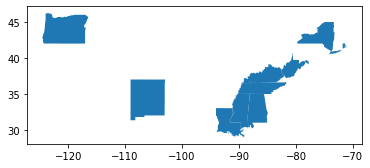

In [99]:
snap_sorted.head(10).plot()

However, I want to make a prettier map that contains all the states and shows the level of which states of the highest and lowest percentages of households with SNAP.

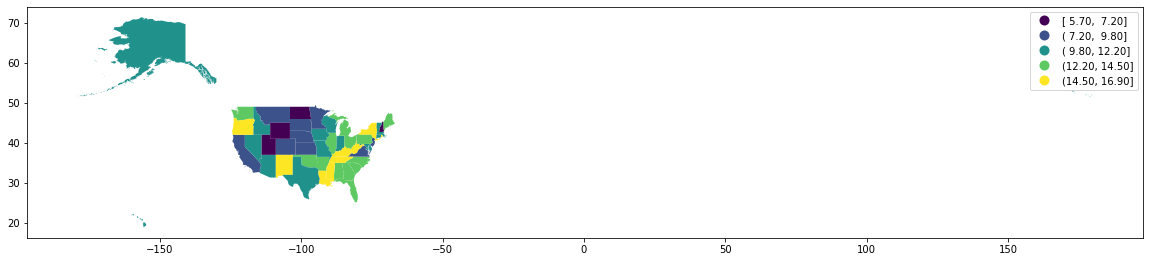

In [101]:
snap.plot(figsize=(20,10),
                 column='Percentage of Households with SNAP',
                 legend=True, 
                 scheme='NaturalBreaks')

## Comparing with Poverty Rates
To add onto this past project, I also wanted to compare the percentage of SNAP usage to poverty levels in each state.

First, I import the data that I need.

In [159]:
pov = gpd.read_file('dataexploration/acs2019_1yr_B06012_04000US46.shp') 

In [160]:
type(pov)

geopandas.geodataframe.GeoDataFrame

In [162]:
pov.head()

,geoid,name,B06012001,B06012001e,B06012002,B06012002e,B06012003,B06012003e,B06012004,B06012004e,B06012005,B06012005e,B06012006,B06012006e,B06012007,B06012007e,B06012008,B06012008e,B06012009,B06012009e,B06012010,B06012010e,B06012011,B06012011e,B06012012,B06012012e,B06012013,B06012013e,B06012014,B06012014e,B06012015,B06012015e,B06012016,B06012016e,B06012017,B06012017e,B06012018,B06012018e,B06012019,B06012019e,B06012020,B06012020e,geometry
0,01000US,United States,320118791.0,24954.0,39490096.0,242000.0,25649024.0,173997.0,254979671.0,339167.0,185564260.0,196455.0,24243587.0,172028.0,15526325.0,113350.0,145794348.0,265628.0,84948054.0,187566.0,8430104.0,69605.0,5390431.0,55317.0,71127519.0,201836.0,5259548.0,53374.0,750987.0,23850.0,448287.0,18889.0,4060274.0,48302.0,44346929.0,177433.0,6065418.0,77677.0,4283981.0,66021.0,33997530.0,131709.0,"MULTIPOLYGON (((-168.22527 -14.53591, -168.199..."
1,04000US01,Alabama,4781688.0,3063.0,739108.0,24870.0,474909.0,21059.0,3567671.0,28961.0,3318113.0,20196.0,543680.0,20242.0,358002.0,17180.0,2416431.0,31191.0,1251736.0,19439.0,158886.0,8486.0,96693.0,8763.0,996157.0,19888.0,40221.0,4022.0,4939.0,1825.0,2243.0,793.0,33039.0,3573.0,171618.0,7360.0,31603.0,4922.0,17971.0,3975.0,122044.0,6767.0,"POLYGON ((-88.13999 34.58170, -88.13997 34.581..."
2,04000US02,Alaska,713725.0,1271.0,71938.0,7880.0,53397.0,6326.0,588390.0,8611.0,307333.0,6583.0,40780.0,5292.0,29149.0,4613.0,237404.0,6967.0,331259.0,8162.0,22512.0,2606.0,19862.0,2945.0,288885.0,7886.0,17691.0,2892.0,2189.0,1270.0,1043.0,1279.0,14459.0,2542.0,57442.0,4149.0,6457.0,2473.0,3343.0,1354.0,47642.0,3432.0,"MULTIPOLYGON (((-165.25416 60.91711, -165.2630..."
3,04000US04,Arizona,7116266.0,3597.0,958442.0,33279.0,601459.0,28470.0,5556365.0,33344.0,2828990.0,26736.0,476245.0,22575.0,283277.0,19424.0,2069468.0,25228.0,3225403.0,28473.0,312358.0,13538.0,204420.0,10082.0,2708625.0,27730.0,98725.0,7215.0,11472.0,1915.0,6691.0,1714.0,80562.0,7103.0,963148.0,18839.0,158367.0,11092.0,107071.0,9651.0,697710.0,17380.0,"POLYGON ((-114.51684 33.02789, -114.51699 33.0..."
4,04000US05,Arkansas,2929117.0,2439.0,474739.0,16707.0,335561.0,19069.0,2118817.0,22293.0,1773818.0,14898.0,304964.0,12633.0,209481.0,13128.0,1259373.0,18820.0,981741.0,15571.0,144151.0,9404.0,100392.0,8292.0,737198.0,16809.0,21427.0,2786.0,2099.0,977.0,1530.0,699.0,17798.0,2876.0,152131.0,6787.0,23525.0,4691.0,24158.0,3887.0,104448.0,6578.0,"POLYGON ((-94.55217 36.10213, -94.55250 36.103..."


## Cleaning up
Similarily, I want to remove columns I don't need and rename them.

I list out all my columns and then choose the ones I want to keep.

In [142]:
list(pov)

['geoid',
 'name',
 'B06012001',
 'B06012001, Error',
 'B06012002',
 'B06012002, Error',
 'B06012003',
 'B06012003, Error',
 'B06012004',
 'B06012004, Error',
 'B06012005',
 'B06012005, Error',
 'B06012006',
 'B06012006, Error',
 'B06012007',
 'B06012007, Error',
 'B06012008',
 'B06012008, Error',
 'B06012009',
 'B06012009, Error',
 'B06012010',
 'B06012010, Error',
 'B06012011',
 'B06012011, Error',
 'B06012012',
 'B06012012, Error',
 'B06012013',
 'B06012013, Error',
 'B06012014',
 'B06012014, Error',
 'B06012015',
 'B06012015, Error',
 'B06012016',
 'B06012016, Error',
 'B06012017',
 'B06012017, Error',
 'B06012018',
 'B06012018, Error',
 'B06012019',
 'B06012019, Error',
 'B06012020',
 'B06012020, Error',
 'geometry']

In [166]:
columns_to_keep = ['geoid',
 'name',
 'B06012001',
 'B06012002',
 'geometry']

In [167]:
pov = pov[columns_to_keep]

I list out all my columns again and rename them.

In [149]:
list(pov)

['geoid', 'name', 'B06012001', 'B06012002']

In [168]:
pov.columns = ['geoid',
 'name',
 'total population',
 'population below 100 percent of the poverty level',
 'geometry']

Because I noticed from before that there was a total for all of United States, I had to remove that row or else my data would be messed up.

In [169]:
pov.head()

,geoid,name,total population,population below 100 percent of the poverty level,geometry
0,01000US,United States,320118791.0,39490096.0,"MULTIPOLYGON (((-168.22527 -14.53591, -168.199..."
1,04000US01,Alabama,4781688.0,739108.0,"POLYGON ((-88.13999 34.58170, -88.13997 34.581..."
2,04000US02,Alaska,713725.0,71938.0,"MULTIPOLYGON (((-165.25416 60.91711, -165.2630..."
3,04000US04,Arizona,7116266.0,958442.0,"POLYGON ((-114.51684 33.02789, -114.51699 33.0..."
4,04000US05,Arkansas,2929117.0,474739.0,"POLYGON ((-94.55217 36.10213, -94.55250 36.103..."


In [175]:
pov = pov.drop([0])

### Normalizing Data
Since all states have a different number of population, I had to convert it to percentages so that there are no misrepresentations.

In [180]:
pov['Percent below 100 percent of poverty level'] = pov['population below 100 percent of the poverty level']/pov['total population']*100

In [181]:
pov.sample(5)

,geoid,name,total population,population below 100 percent of the poverty level,geometry,Percent below 100 percent of poverty level
15,04000US18,Indiana,6517430.0,775823.0,"POLYGON ((-87.52659 40.47688, -87.52658 40.478...",11.903818
32,04000US35,New Mexico,2053305.0,373230.0,"POLYGON ((-106.00632 36.99527, -106.00531 36.9...",18.177037
48,04000US53,Washington,7470152.0,730240.0,"POLYGON ((-123.24792 48.28456, -123.24751 48.2...",9.775437
3,04000US04,Arizona,7116266.0,958442.0,"POLYGON ((-114.51684 33.02789, -114.51699 33.0...",13.468327
35,04000US38,North Dakota,738814.0,78112.0,"POLYGON ((-104.04497 47.33014, -104.04496 47.3...",10.572620


### Sorting
Next, I sort the states to the top 10 states that have the highest percentages of population below 100 percent of poverty level.

In [185]:
pov_sorted = pov.sort_values(by='Percent below 100 percent of poverty level',ascending = False)

In [186]:
pov_sorted[['geoid','name','Percent below 100 percent of poverty level']].head(10)

,geoid,name,Percent below 100 percent of poverty level
25,04000US28,Mississippi,19.604683
19,04000US22,Louisiana,18.997289
32,04000US35,New Mexico,18.177037
18,04000US21,Kentucky,16.262534
4,04000US05,Arkansas,16.207581
49,04000US54,West Virginia,16.027946
1,04000US01,Alabama,15.457052
37,04000US40,Oklahoma,15.176079
43,04000US47,Tennessee,13.854006
41,04000US45,South Carolina,13.845922


### Visualization
I then visualize the United States to see which states of higher and lower percentage of populations below 100 percent of poverty level.

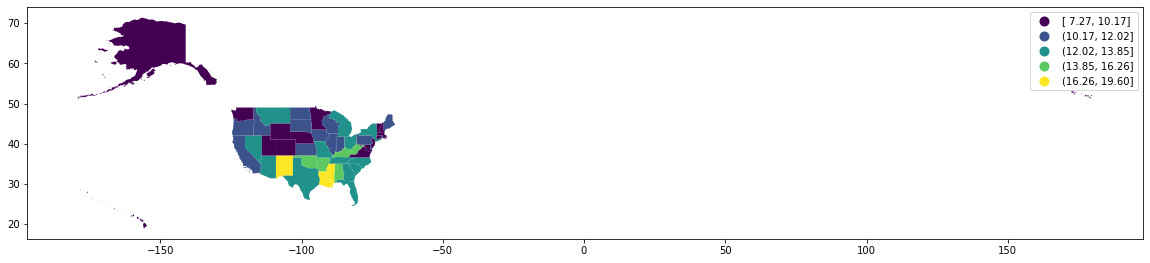

In [182]:
pov.plot(figsize=(20,10),
                 column='Percent below 100 percent of poverty level',
                 legend=True, 
                 scheme='NaturalBreaks')

Because I wanted to create a comparison of the percentage of households receving SNAP and percentage of population below poverty line of each state, I brought the previous visualization beneath.

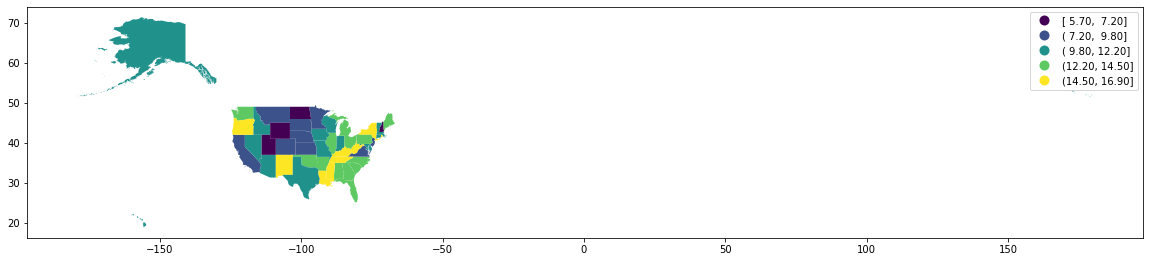

In [183]:
snap.plot(figsize=(20,10),
                 column='Percentage of Households with SNAP',
                 legend=True, 
                 scheme='NaturalBreaks')

From the map, I can see that states like New Mexico and Louisiana both appear to be on the highest percentage of SNAP households and populations below poverty line.